# Final metrics

# Imports

In [2]:
import pandas as pd
from sklearn.metrics import classification_report, auc
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from seaborn import heatmap
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Read files

In [3]:
files = '../data/results/results_v1.csv', '../data/results/results_v2.csv', '../data/results/results_v3.csv', '../data/results/results_v4.csv'
dfs = [pd.read_csv(file) for file in files]
dfs[0].head()

,filename,true_class,pred_class
0,I_CIDIMEC_Background_1.mp4,Background,Gun
1,I_CIDIMEC_Background_2.mp4,Background,Gun
2,I_CIDIMEC_Background_3.mp4,Background,Gun
3,I_CIDIMEC_Background_4.mp4,Background,Gun
4,I_CIDIMEC_Gun_1.mp4,Gun,Gun


## Encode files

In [4]:
for df in dfs:
    df['true_class'] = LabelEncoder().fit_transform(df['true_class'])
    df['pred_class'] = LabelEncoder().fit_transform(df['pred_class'])
dfs[0].head()    

,filename,true_class,pred_class
0,I_CIDIMEC_Background_1.mp4,0,1
1,I_CIDIMEC_Background_2.mp4,0,1
2,I_CIDIMEC_Background_3.mp4,0,1
3,I_CIDIMEC_Background_4.mp4,0,1
4,I_CIDIMEC_Gun_1.mp4,1,1


In [5]:
for i, df in enumerate(dfs):
    print("-"*50+f" Model {i+1} "+"-"*50)
    print(classification_report(df['true_class'], df['pred_class']))

-------------------------------------------------- Model 1 --------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.43      1.00      0.60        16
           2       1.00      0.12      0.22        16

    accuracy                           0.45        40
   macro avg       0.48      0.38      0.28        40
weighted avg       0.57      0.45      0.33        40

-------------------------------------------------- Model 2 --------------------------------------------------
              precision    recall  f1-score   support

           0       0.17      0.11      0.13         9
           1       0.42      0.87      0.57        15
           2       1.00      0.19      0.32        16

    accuracy                           0.42        40
   macro avg       0.53      0.39      0.34        40
weighted avg       0.59      0.42      0.37        40

------------------

In [6]:
# Classification reports
print('Accuracy, Precision, Recall, F1-score, AUC')
for i, df in enumerate(dfs):
    # print: accuracy, precision, recall, f1-score, auc
    print(round(accuracy_score(df['true_class'], df['pred_class']), 2), end=',')
    print(round(precision_score(df['true_class'], df['pred_class'], average='macro'), 2), end=',')
    print(round(recall_score(df['true_class'], df['pred_class'], average='macro'), 2), end=',')
    print(round(f1_score(df['true_class'], df['pred_class'], average='macro'), 2), end=',')
    print(round(roc_auc_score([1 if x > 0 else 0 for x in df['true_class']], df['pred_class']), 2))
    

Accuracy, Precision, Recall, F1-score, AUC
0.45,0.48,0.38,0.28,0.52
0.42,0.53,0.39,0.34,0.52
0.5,0.65,0.52,0.48,0.6
0.38,0.57,0.4,0.35,0.5


## Confusion matrixes

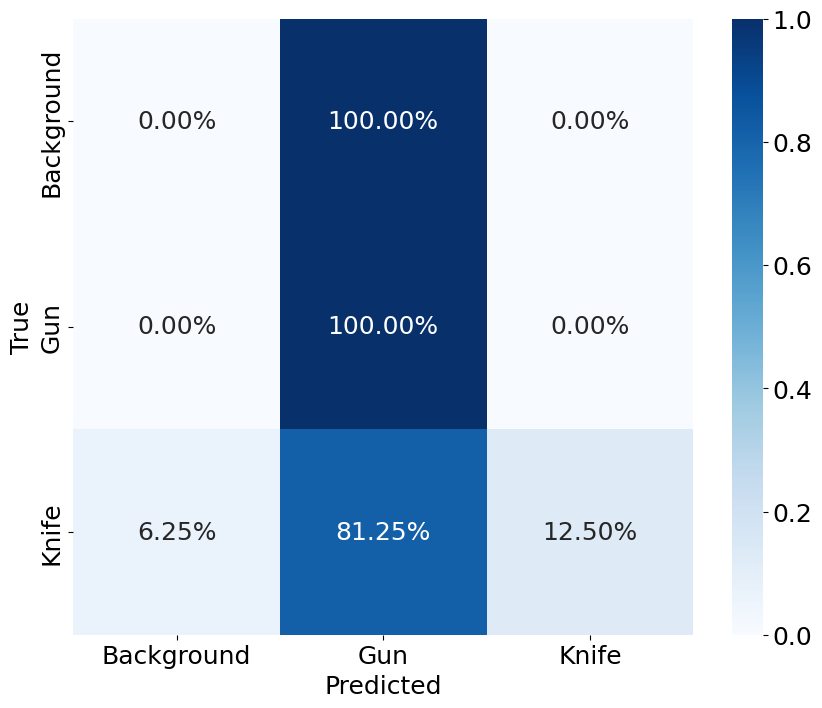

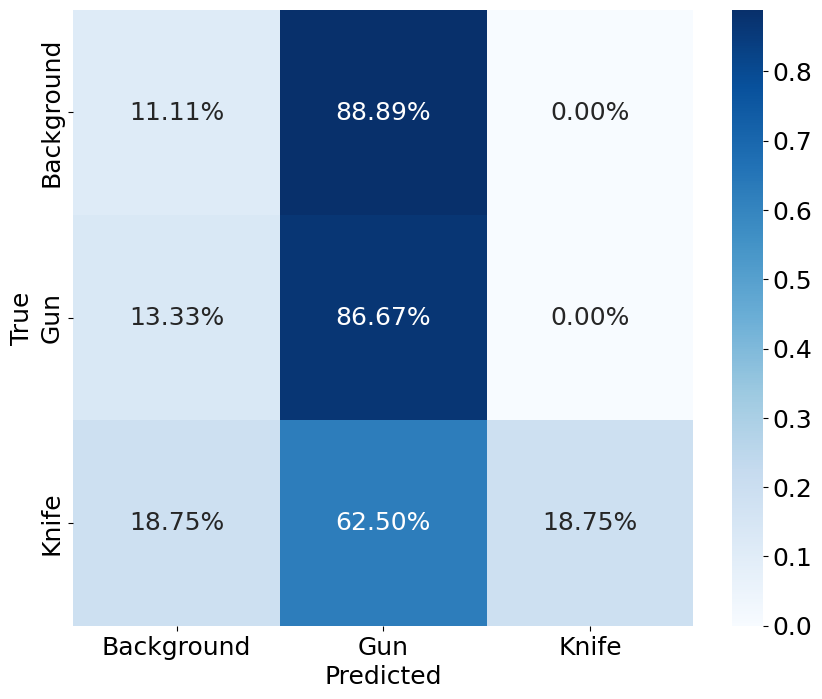

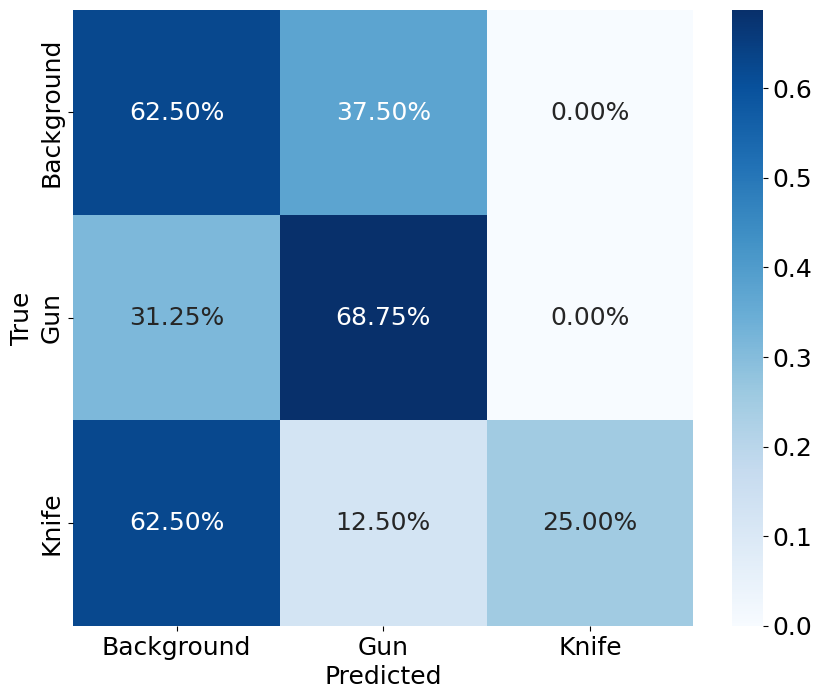

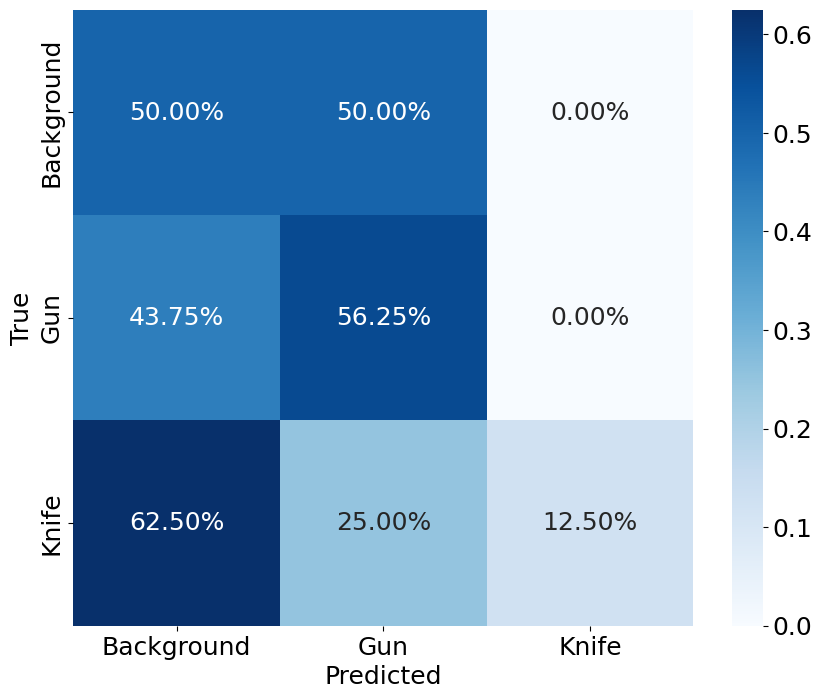

In [7]:
meanings = [
    "Roboflow inference server",
    "Roboflow inference server with background removal",
    "TensortRT with background removal",
    "TensortRT with background removal and grayscale"
]
for meaning, df in zip(meanings, dfs):
    confusion_matrix_percentage = pd.crosstab(df['true_class'], df['pred_class'], rownames=['True'], colnames=['Predicted'], margins=True, normalize='index')
    plt.figure(figsize=(10, 8))

    # Change axes by classnames: ['Background', 'Gun, 'Knife']
    confusion_matrix_percentage = confusion_matrix_percentage.rename(columns={0: 'Background', 1: 'Gun', 2: 'Knife', 3: 'All'})
    confusion_matrix_percentage = confusion_matrix_percentage.rename(index={0: 'Background', 1: 'Gun', 2: 'Knife', 3: 'All'})

    # Remove all column and row with 'All' class
    confusion_matrix_percentage = confusion_matrix_percentage.drop('All', axis=0)

    # Change font size
    plt.rcParams.update({'font.size': 18})

    # Plot heatmap
    heatmap(confusion_matrix_percentage, annot=True, fmt='.2%', cmap='Blues')
    # plt.title(f"Confusion matrix for {meaning}", pad=30, fontsize=20)